## iris => 4개 꽃잎길이/너비 => 2진분류: 100개

-   SVC


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearnex import patch_sklearn, unpatch_sklearn

patch_sklearn()
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.svm import SVC


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
data = load_iris(as_frame=True)
X = data.data
y = data.target
irisDF = pd.concat([X, y], axis=1, sort=False)
irisDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [3]:
two_irisDF = irisDF[irisDF["target"].isin([0, 1])]
two_irisDF.info()


<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   target             100 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 4.3 KB


In [4]:
featureDF = two_irisDF[["petal length (cm)", "petal width (cm)"]]
targetSR = two_irisDF["target"]


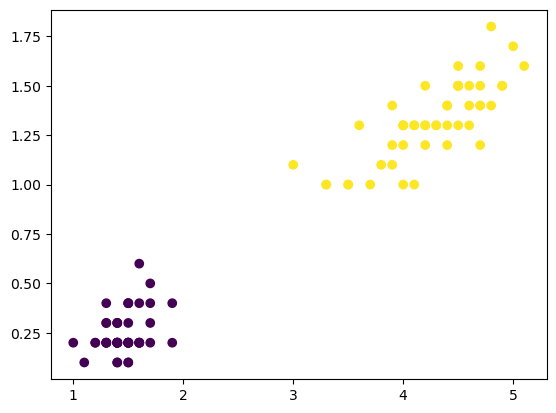

In [5]:
plt.scatter(
    featureDF[featureDF.columns[0]], featureDF[featureDF.columns[1]], c=targetSR
)


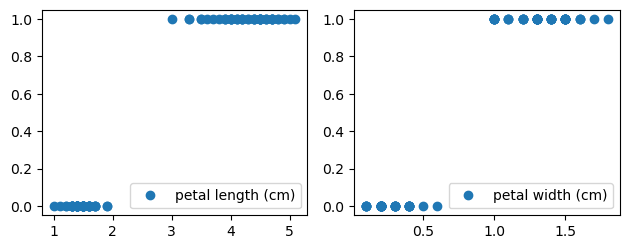

In [6]:
for idx, feature in enumerate(featureDF.columns, 1):
    plt.subplot(2, 2, idx)
    plt.plot(featureDF[feature], targetSR, "o", label=feature)
    plt.legend()
plt.tight_layout()
plt.show()


In [7]:
def fit_trans_scaler(scaler, X_train, X_test):
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled


In [8]:
def display_score(model, X_train, y_train, X_test, y_test):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    scores = {"train": train_score, "test": test_score}
    for average in ["micro", "macro", "samples", "weighted", "binary"]:
        try:
            precision_score_ = precision_score(y_test, y_pred, average=average)
            recall_score_ = recall_score(y_test, y_pred, average=average)
            f1_score_ = f1_score(y_test, y_pred, average=average)
            scores.update(
                {
                    f"{average}_precision_score": precision_score_,
                    f"{average}_recall_score": recall_score_,
                    f"{average}_f1_score": f1_score_,
                }
            )
        except:
            continue
    return scores


In [9]:
scalers = []
scalers.append(StandardScaler())
scalers.append(MinMaxScaler())
scalers.append(RobustScaler())


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    featureDF, targetSR, test_size=0.2, random_state=6, stratify=targetSR
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(80, 2) (20, 2) (80,) (20,)


In [11]:
scoreDict = {}
i = 0
for scaler in scalers:
    scaled_X_train, scaled_X_test = fit_trans_scaler(scaler, X_train, X_test)
    model = SVC(kernel="linear", probability=True).fit(scaled_X_train, y_train)
    scores = display_score(model, scaled_X_train, y_train, scaled_X_test, y_test)
    scoreDict[i] = {"scaler": scaler, **scores}
    i += 1


In [12]:
scoreDF = pd.DataFrame(scoreDict).T
scoreDF


,scaler,train,test,micro_precision_score,micro_recall_score,micro_f1_score,macro_precision_score,macro_recall_score,macro_f1_score,weighted_precision_score,weighted_recall_score,weighted_f1_score,binary_precision_score,binary_recall_score,binary_f1_score
0,StandardScaler(),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,MinMaxScaler(),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,RobustScaler(),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
scaled_X_train, scaled_X_test = fit_trans_scaler(scalers[0], X_train, X_test)
model = SVC(kernel="linear", probability=True).fit(scaled_X_train, y_train)


In [14]:
t_data = scaled_X_train.T


In [15]:
support = model.support_vectors_.T


In [16]:
scaled_X_test


array([[ 0.99960847,  0.93934406],
       [-0.94576336, -0.68254497],
       [-1.01524093, -1.04296475],
       [-1.15419606, -1.04296475],
       [-1.01524093, -0.86275486],
       [-0.80680823, -1.04296475],
       [ 1.20804117,  1.11955396],
       [-1.08471849, -0.68254497],
       [ 0.79117578,  0.93934406],
       [-0.87628579, -1.04296475],
       [ 1.1385636 ,  1.47997374],
       [ 0.79117578,  0.93934406],
       [ 0.93013091,  1.29976385],
       [ 0.30483282,  0.39871439],
       [-0.94576336, -1.04296475],
       [ 1.41647387,  1.29976385],
       [-1.08471849, -1.04296475],
       [-0.94576336, -1.22317464],
       [ 1.1385636 ,  1.29976385],
       [ 1.1385636 ,  1.29976385]])

In [17]:
w = model.coef_
b = model.intercept_
a = -w[:, 0] / w[:, 1]


In [18]:
model.decision_function(scaled_X_test)


array([ 2.22864377, -1.31406869, -1.72737782, -1.87059666, -1.55652797,
       -1.51254956,  2.61432188, -1.45728754,  2.0138155 , -1.58415898,
        2.88441217,  2.0138155 ,  2.49873405,  1.        , -1.6557684 ,
        3.        , -1.79898724, -1.82661825,  2.71356231,  2.71356231])

In [19]:
scaled_X_test[:, 0] * w[:, 0] + scaled_X_test[:, 1] * w[:, 1] + b


array([ 2.22864377, -1.31406869, -1.72737782, -1.87059666, -1.55652797,
       -1.51254956,  2.61432188, -1.45728754,  2.0138155 , -1.58415898,
        2.88441217,  2.0138155 ,  2.49873405,  1.        , -1.6557684 ,
        3.        , -1.79898724, -1.82661825,  2.71356231,  2.71356231])

In [20]:
d = (-t_data[0] * w[:, 0] - b) / w[:, 1]
margin = 1 / np.sqrt(np.sum(w**2))
d_up = d + np.sqrt(1 + a**2) * margin
d_down = d - np.sqrt(1 + a**2) * margin


In [35]:
dDF = pd.concat(
    map(lambda x: pd.Series(x), [t_data[0], d, d_up, d_down]),
    axis=1,
    keys=["x", "d", "d_up", "d_down"],
)
dDF.sort_values(by="x", inplace=True)
dDF


,x,d,d_up,d_down
63,-1.293151,1.081178,2.135963,0.026393
24,-1.223674,1.005645,2.060431,-0.049140
30,-1.154196,0.930113,1.984898,-0.124672
50,-1.084718,0.854580,1.909366,-0.200205
16,-1.084718,0.854580,1.909366,-0.200205
...,...,...,...,...
15,1.346996,-1.789059,-0.734274,-2.843844
28,1.346996,-1.789059,-0.734274,-2.843844
58,1.416474,-1.864592,-0.809807,-2.919377
6,1.485951,-1.940124,-0.885339,-2.994909


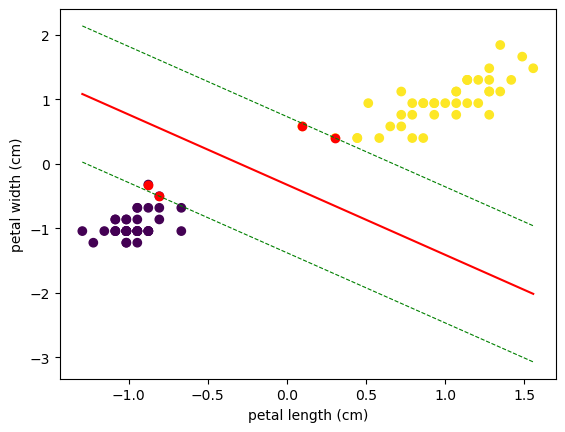

In [39]:
plt.scatter(t_data[0], t_data[1], c=y_train)
plt.plot(support[0], support[1], "ro")
plt.plot(dDF["x"], dDF["d"], "r")
plt.plot(dDF["x"], dDF["d_up"], "g--", lw=0.8)
plt.plot(dDF["x"], dDF["d_down"], "g--", lw=0.8)
plt.xlabel(featureDF.columns[0])
plt.ylabel(featureDF.columns[1])
plt.show()
